# Establishing baseline, beating the baseline, and model that overfits

### Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../helpers/')
from plot_graphs import plot_loss, plot_acc

## 1. Establishing the baseline and importing datasets

> Baseline accuracy is 16.67%

### 1.1 Setting Batch and Image size

In [2]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

### 1.2 Loading the train val and test data

In [3]:
train = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

train = train.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val = val.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
test = test.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

Found 3840 files belonging to 6 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 480 files belonging to 6 classes.
Found 480 files belonging to 6 classes.


2022-08-28 23:53:53.950716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-28 23:53:53.950892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 2. Small model to beat baseline

> Explain small model...

### 2.1 Defining the model

In [4]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(8, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_baseline = keras.Model(inputs, outputs)

model_baseline.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_baseline.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        1168      
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                      

### 2.2 Running the model

In [5]:
history_baseline = model_baseline.fit(
  train,
  epochs=10,
  validation_data=val
)

Epoch 1/10


2022-08-28 23:53:54.456293: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-28 23:53:54.456366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 3s 19ms/step - loss: 1.7845 - accuracy: 0.1990 - val_loss: 1.7709 - val_accuracy: 0.2438


2022-08-28 23:53:56.710019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/10
120/120 [==============================] - 2s 16ms/step - loss: 1.7584 - accuracy: 0.2310 - val_loss: 1.7474 - val_accuracy: 0.2542
Epoch 3/10
120/120 [==============================] - 2s 16ms/step - loss: 1.7330 - accuracy: 0.2529 - val_loss: 1.7216 - val_accuracy: 0.2833
Epoch 4/10
120/120 [==============================] - 2s 16ms/step - loss: 1.7051 - accuracy: 0.2779 - val_loss: 1.6928 - val_accuracy: 0.3021
Epoch 5/10
120/120 [==============================] - 2s 16ms/step - loss: 1.6768 - accuracy: 0.2951 - val_loss: 1.6629 - val_accuracy: 0.3396
Epoch 6/10
120/120 [==============================] - 2s 16ms/step - loss: 1.6503 - accuracy: 0.3122 - val_loss: 1.6343 - val_accuracy: 0.3438
Epoch 7/10
120/120 [==============================] - 2s 16ms/step - loss: 1.6258 - accuracy: 0.3255 - val_loss: 1.6063 - val_accuracy: 0.3375
Epoch 8/10
120/120 [==============================] - 2s 16ms/step - loss: 1.6029 - accuracy: 0.3372 - val_loss: 1.5797 - val_accuracy: 0.3333

### 2.3 Plotting graphs

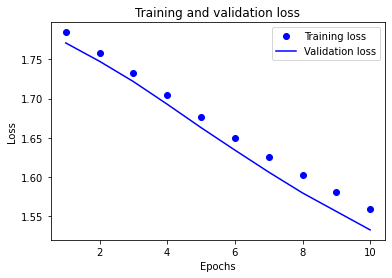

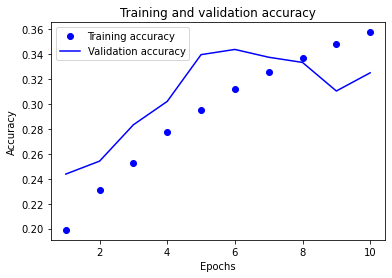

In [6]:
plot_loss(history_baseline)
plot_acc(history_baseline)

## 3. Scaling up: a model that overfits

1. Add layers.
2. Make the layers bigger.
3. Train for more epochs.

### 3.1 Defining the model

In [18]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_overfitting = keras.Model(inputs, outputs)

model_overfitting.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_overfitting.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 49, 49, 8)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 47, 47, 16)        1168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                       

### 3.2 Training the model

In [19]:
history_overfitting = model_overfitting.fit(
  train,
  epochs=50,
  validation_data=val
)

Epoch 1/50


2022-08-29 00:06:43.041835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 3s 20ms/step - loss: 1.7811 - accuracy: 0.2102 - val_loss: 1.7665 - val_accuracy: 0.1688


2022-08-29 00:06:45.456702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/50
120/120 [==============================] - 2s 18ms/step - loss: 1.6950 - accuracy: 0.2909 - val_loss: 1.6538 - val_accuracy: 0.2479
Epoch 3/50
120/120 [==============================] - 2s 18ms/step - loss: 1.5659 - accuracy: 0.3815 - val_loss: 1.5017 - val_accuracy: 0.3813
Epoch 4/50
120/120 [==============================] - 2s 18ms/step - loss: 1.4465 - accuracy: 0.4487 - val_loss: 1.3649 - val_accuracy: 0.4917
Epoch 5/50
120/120 [==============================] - 2s 18ms/step - loss: 1.3557 - accuracy: 0.4818 - val_loss: 1.2725 - val_accuracy: 0.5375
Epoch 6/50
120/120 [==============================] - 2s 18ms/step - loss: 1.2907 - accuracy: 0.5107 - val_loss: 1.2083 - val_accuracy: 0.5563
Epoch 7/50
120/120 [==============================] - 2s 18ms/step - loss: 1.2418 - accuracy: 0.5266 - val_loss: 1.1602 - val_accuracy: 0.5875
Epoch 8/50
120/120 [==============================] - 2s 18ms/step - loss: 1.2048 - accuracy: 0.5359 - val_loss: 1.1240 - val_accuracy: 0.5979

### 3.3 Plotting graphs

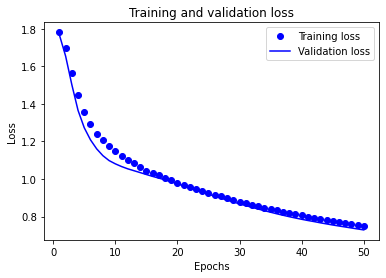

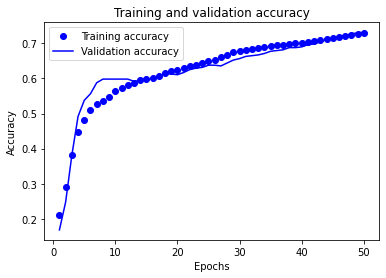

In [20]:
plot_loss(history_overfitting)
plot_acc(history_overfitting)